In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
protein_mod_events = pd.read_csv("../data/Fig5B_D_SupplFig_4_Modifications/Suppl_Table_2_Modification_Sites.tsv", sep="\t")

### Histogram over weight

Text(0.5, 1.0, 'Distribution of Mass Shifts for PTM Sites')

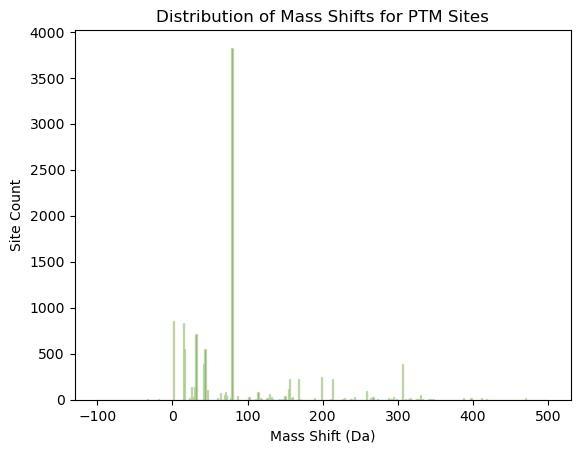

In [3]:
# histogram of mass shifts
plt.hist(protein_mod_events[protein_mod_events["unimod_classification"] == "Post-translational"]["mass_shift"].dropna(), bins=400, color='#4E8946', alpha=0.7, range=(-100, 500), edgecolor='#B9D799')
plt.xlabel('Mass Shift (Da)')
plt.ylabel('Site Count')

plt.title('Distribution of Mass Shifts for PTM Sites')

Text(0.5, 1.0, 'Distribution of Mass Shifts for Modified Sites')

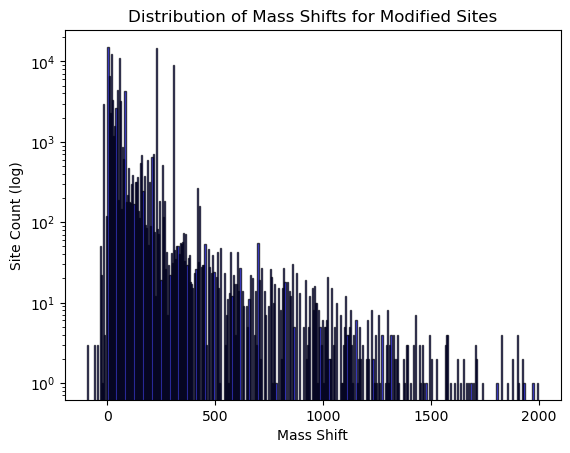

In [4]:
# histogram of mass shifts
plt.hist(protein_mod_events["mass_shift"].dropna(), bins=400, color='blue', alpha=0.7, edgecolor='black', log=True)
plt.xlabel('Mass Shift')
plt.ylabel('Site Count (log)')
plt.title('Distribution of Mass Shifts for Modified Sites')

Text(0.5, 1.0, 'Number of Modification Sites vs NSAF')

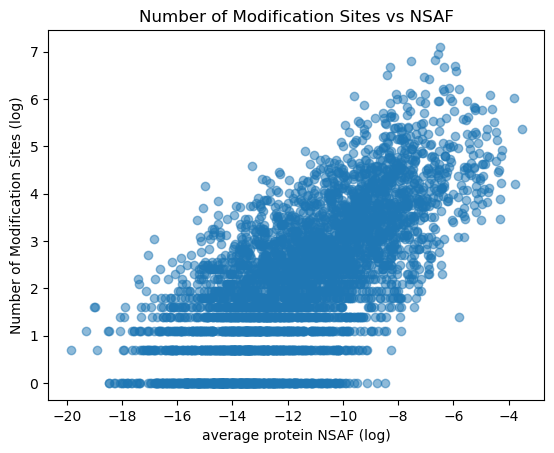

In [5]:
NSAFs = pd.read_csv('../data/Fig5_Modifications/NSAF_unique_peptides_canonical.tsv', sep = '\t', index_col = 0).T
NSAFs["protein_NSAF"] = NSAFs.apply(lambda row: row.mean(), axis=1)
NSAFs_per_protein = NSAFs[["protein_NSAF"]]

# plot number of modification sites
mod_site_counts = protein_mod_events.groupby("protein_id").size().reset_index(name='count').sort_values(by="count", ascending=False)
mod_site_counts = mod_site_counts.merge(NSAFs_per_protein, left_on="protein_id", right_index=True)
mod_site_counts["protein_NSAF_log"] = np.log(mod_site_counts["protein_NSAF"])
mod_site_counts["count_log"] = np.log(mod_site_counts["count"])

plt.scatter(mod_site_counts["protein_NSAF_log"], mod_site_counts["count_log"], alpha=0.5)
plt.xlabel('average protein NSAF (log)')
plt.ylabel('Number of Modification Sites (log)')
plt.title('Number of Modification Sites vs NSAF')

In [6]:
# calculate pearson correlation coefficient
correlation = mod_site_counts["protein_NSAF_log"].corr(mod_site_counts["count_log"])
print(f"Pearson correlation coefficient: {correlation:.2f}")

Pearson correlation coefficient: 0.70
